In [73]:
#imprt Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [2]:
#import Data
data_train=pd.read_csv('../../data/Car_train-data.csv')

In [3]:
#Data Look
data_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<b> <p style="color:#289e00">Data Clean Part </p> </b>

In [4]:
data_train=data_train.iloc[:,1:]

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
#selection of important columns
data_train_c=data_train.iloc[:,[2,3,4,5,7,8,9,12]]

In [7]:
#firstly we need to Clean the data for This Dataframe
data_train_c.replace({' ':np.nan,'null':np.nan},inplace=True)
data_train_c=data_train_c.dropna()

<b> <p style="color:red">Waring: Again we need to check Every column in does not exists any  unknown things i.e "null" ,'None','NA' and 'none' etc. Because dropna Can't remove string null like 'null'. if you are not remove this thing then  error will be occur in ahead data maniplution </p> </b>

In [8]:
# How To check Above Instruction
for i in data_train_c.columns:
     print(data_train_c[i].unique()) #unique value for each column

[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
[72000 41000 46000 ... 45004 70602 27365]
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl'
 '16.55 kmpl' '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl'
 '15.04 kmpl' '25.17 kmpl' '20.36 kmpl' '13.29 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '

In [9]:
# Here you can see 'null bhp' occur so it's replace by np.nan and then drop this raw
data_train_c.replace({'null bhp':np.nan,'null km/kg':np.nan,'null CC':np.nan},inplace=True)
data_train_c=data_train_c.dropna()

<b> <p style="color:#289e00">Data Maniplution Part </p> </b>

In [10]:
#remove extenation  km/kg ,bhp, CC from below column and convert string into float Value
l1=['Mileage','Engine','Power']
for i in l1:
    data_train_c[i]=data_train_c[i].str.split(" ").apply(lambda x:x[0])
    data_train_c[i] = data_train_c[i].str.strip()
    data_train_c[i] = data_train_c[i].astype(float)


In [11]:
#Data Look 
data_train_c.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,26.60,998.0,58.16,1.75
1,2015,41000,Diesel,Manual,19.67,1582.0,126.20,12.50
2,2011,46000,Petrol,Manual,18.20,1199.0,88.70,4.50
3,2012,87000,Diesel,Manual,20.77,1248.0,88.76,6.00
4,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,17.74


In [12]:
data_train_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [13]:
#Fule_Type column is Categorical data so we need to convert into numeric order for Better Price prediction 
data_train_c.Fuel_Type.replace({'Petrol':1,'CNG':3,'Diesel':2,'LPG':4},inplace=True)

In [14]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5874 non-null   int64  
 1   Kilometers_Driven  5874 non-null   int64  
 2   Fuel_Type          5874 non-null   int64  
 3   Transmission       5874 non-null   object 
 4   Mileage            5874 non-null   float64
 5   Engine             5874 non-null   float64
 6   Power              5874 non-null   float64
 7   Price              5874 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 413.0+ KB


In [15]:

data_train_c.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
# Above thing apply in Transmission column
data_train_c.Transmission.replace({'Manual':2,'Automatic':1},inplace=True)

In [17]:
data_train_c.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,2010,72000,3,2,26.60,998.0,58.16,1.75
1,2015,41000,2,2,19.67,1582.0,126.20,12.50
2,2011,46000,1,2,18.20,1199.0,88.70,4.50
3,2012,87000,2,2,20.77,1248.0,88.76,6.00
4,2013,40670,2,1,15.20,1968.0,140.80,17.74


In [18]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5874 non-null   int64  
 1   Kilometers_Driven  5874 non-null   int64  
 2   Fuel_Type          5874 non-null   int64  
 3   Transmission       5874 non-null   int64  
 4   Mileage            5874 non-null   float64
 5   Engine             5874 non-null   float64
 6   Power              5874 non-null   float64
 7   Price              5874 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 413.0 KB


<i><big> <p style="color:#9e009e"> Linear Regression</big> </i> </p>
<br>
<b> Our Target Variable is Price </b>

<b> step1: we need to find relationship between Independent variable(IV) vs Dependent variable(DI) </b>

In [19]:
%matplotlib inline

In [20]:
'''Before we apply first step  look our  data range  menas  we need to check range  of column  values 
so we will be visualize easily our plot with Price column value'''
for i in data_train_c.columns:
    print(i)
    print(data_train_c[i].describe())

Year
count    5874.000000
mean     2013.476507
std         3.166025
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64
Kilometers_Driven
count    5.874000e+03
mean     5.832412e+04
std      9.215466e+04
min      1.710000e+02
25%      3.343125e+04
50%      5.262150e+04
75%      7.240825e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64
Fuel_Type
count    5874.000000
mean        1.560606
std         0.524705
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Fuel_Type, dtype: float64
Transmission
count    5874.000000
mean        1.710249
std         0.453686
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Transmission, dtype: float64
Mileage
count    5874.000000
mean       18.273829
std         4.371965
min         0.000000
25%        15.260000
50%        18.200000
75%   

In [35]:
''' Here 'Kilometers_Driven' in High value data so we need to convert high value to lower value
therfore we easily compare with  price value '''
data_train_c['KM_Drlog_form'] = np.log(data_train_c['Kilometers_Driven'])



<b> Now we will see our relationship between IV and DI </b>

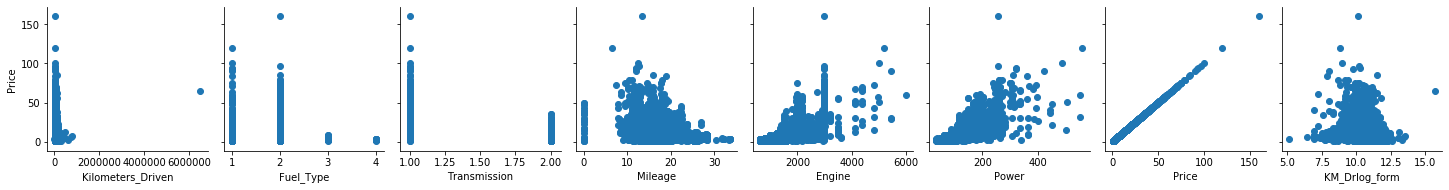

In [39]:
#Scatter plot
g = sns.PairGrid(data_train_c,

                 x_vars=data_train_c.columns[1:],

                 y_vars=['Price'])
g = g.map(plt.scatter)

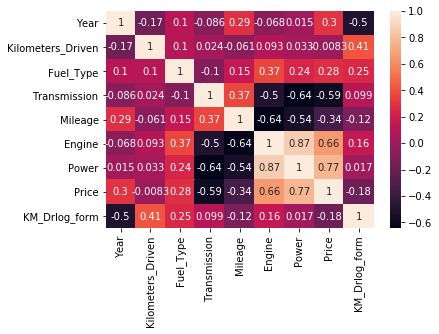

In [40]:
#Heatmap relationship all columns
sns.heatmap(data=data_train_c.corr(), annot = True)

In [41]:
data_train_c.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage',
       'Engine', 'Power', 'Price', 'KM_Drlog_form'],
      dtype='object')

In [91]:
model=sm.OLS.from_formula('Price~Power+Engine+Transmission+Mileage+Mileage+Fuel_Type',data=data_train_c)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1961.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:20:54   Log-Likelihood:                -19665.
No. Observations:                5874   AIC:                         3.934e+04
Df Residuals:                    5868   BIC:                         3.938e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.8927      0.925     -6.368   

In [90]:
df = pd.DataFrame() 

for i in ['Power','Engine','Transmission','Mileage','Mileage','Fuel_Type']:
    df[i]=data_train_c[i]
df['Pre_Price']=res.predict(df)
df['Orignal_Price']=data_train_c['Price']

In [89]:
df

,Power,Engine,Transmission,Mileage,Pre_Price,Orignal_Price
0,58.16,998.0,2,26.60,2.573408,1.75
1,126.20,1582.0,2,19.67,10.646326,12.50
2,88.70,1199.0,2,18.20,4.350522,4.50
3,88.76,1248.0,2,20.77,5.284468,6.00
4,140.80,1968.0,1,15.20,15.782984,17.74
...,...,...,...,...,...,...
6014,74.00,1248.0,2,28.40,5.754192,4.75
6015,71.00,1120.0,2,24.40,3.817959,4.00
6016,112.00,2498.0,2,14.00,8.126795,2.90
6017,67.10,998.0,2,18.90,1.266620,2.65


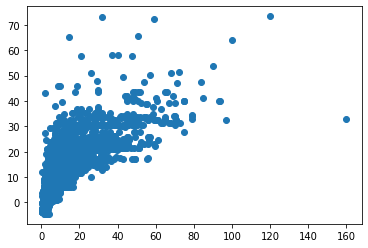

In [86]:
plt.scatter(df['Orignal_Price'],df['Pre_Price'])